iris : 150 individus, iris_dna : 146 individus


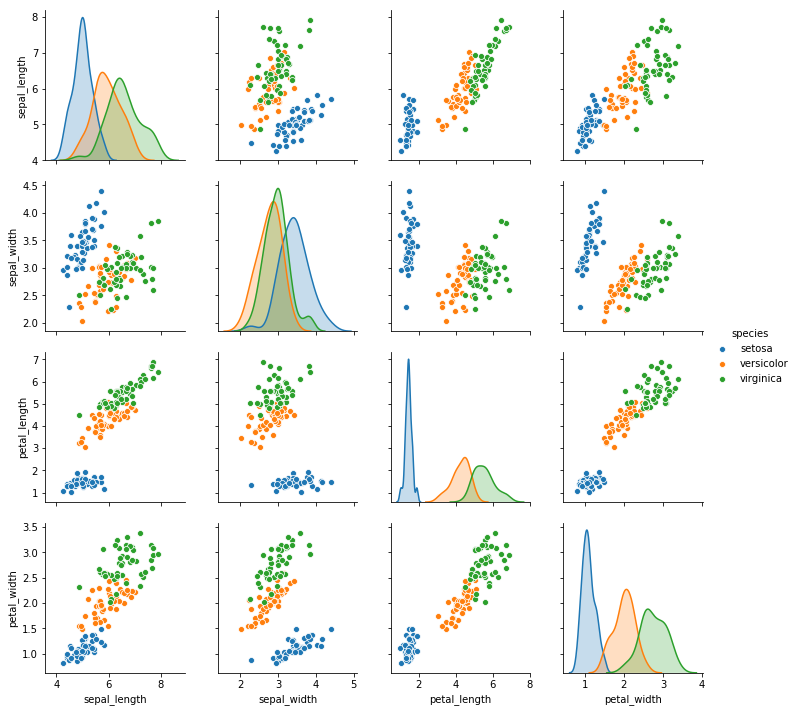

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement
iris = pd.read_csv("datasets/iris_dataset.csv")

# On renomme les colonnes
iris.columns = ["id","sepal_length","sepal_width","petal_length","petal_width","species"]

# On supprime l'identifiant des iris
del iris["id"]

# On supprime les individus contenant au moins une valeur manquante
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individus, iris_dna : {} individus".format(len(iris),len(iris_dna)))

# Affichage des diagrammes de dispersion
sns.pairplot(iris_dna,hue="species")
plt.show()

# Questions

#### Q1 

In [2]:
correlations = iris_dna.corr()
print('petal_width et petal_length Pearson correlation:',round(correlations['petal_width']['petal_length'],3))
print('sepal_width et petal_width Pearson correlation:',round(correlations['sepal_width']['petal_width'],3))

petal_width et petal_length Pearson correlation: 0.942
sepal_width et petal_width Pearson correlation: -0.248


#### Q2

Commentaires : 
* Graphiquement, le diagramme de dispersion des caractéristiques petal_width et petal_length révelait une relation linéare. On pourrait dessiner la droite f(x) = y avec x petal_width et y = petal_length. Autrement dit quand on augmente petal_width, on augmente petal_length. On retrouve bien une correlation forte (0.94) entre ces deux variables.
* C'est l'inverse pour le couple sepal_width et petal_width où visiblement, quand on augmente l'un l'autre n'augmente pas nécessairement, d'où une coeficient de correlation de Pearson faible : -0,25.

$[\hat{a}=\frac{s_{X,Y}}{s^2_X} \ \ \ \ \ \text{et}\ \ \ \ \ \hat{b}=\overline{y}-\hat{a}\overline{x}]$

#### Q3

In [3]:
iris_setosa = iris_dna.loc[iris_dna['species'] =='setosa'].copy()
iris_versicolor = iris_dna.loc[iris_dna['species'] =='versicolor'].copy()
iris_virginica = iris_dna.loc[iris_dna['species'] =='virginica'].copy()

In [4]:
import statsmodels.api as sm

# cas 1:  X est la variable petal_length et Y la variable petal_width, sur le dataframe iris_dn

X = iris_dna[['petal_length']].copy()
X['intercept'] = 1
print('X shape:',X.shape)

y = iris_dna['petal_width']
print('y shape:',y.shape)

result = sm.OLS(y, X).fit()
a1,b1 = result.params['petal_length'],result.params['intercept']

print('a:',round(a1,3),'b:',round(b1,3))

X shape: (146, 2)
y shape: (146,)
a: 0.386 b: 0.509


In [5]:
#cas 2: X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_setosa

X = iris_setosa[['petal_width']].copy()
X['intercept'] = 1

y = iris_setosa['sepal_width']

result = sm.OLS(y, X).fit()
a2,b2 = result.params['petal_width'],result.params['intercept']

print('a:',round(a2,3),'b:',round(b2,3))

a: 1.788 b: 1.459


In [6]:
#cas 3/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_virginica

X = iris_virginica[['petal_width']].copy()
X['intercept'] = 1

y = iris_virginica['sepal_width']

result = sm.OLS(y, X).fit()
a3,b3 = result.params['petal_width'],result.params['intercept']

print('a:',round(a3,3),'b:',round(b3,3))

a: 0.699 b: 1.038


In [7]:
#cas 3/ X est la variable petal_width et Y la variable sepal_width, sur le dataframe iris_versicolor

X = iris_versicolor[['petal_width']].copy()
X['intercept'] = 1

y = iris_versicolor['sepal_width']

result = sm.OLS(y, X).fit()
a4,b4 = result.params['petal_width'],result.params['intercept']

print('a:',round(a4,3),'b:',round(b4,3))

a: 0.974 b: 0.809


In [8]:
subset = iris.loc[(iris['sepal_width'].isna()) | (iris['petal_width'].isna())]
subset

,sepal_length,sepal_width,petal_length,petal_width,species
3,4.603747,NaN,1.480616,1.002344,setosa
53,5.442775,2.340928,4.027838,NaN,versicolor
61,5.879497,NaN,4.181942,2.259954,versicolor
100,6.230628,NaN,6.001908,3.321872,virginica


#### Q4

In [9]:
coeffs = {
    "cas 1" : {'a': a1 , 'b':b1},
    "cas 2" : {'a': a2 , 'b':b2},
    "cas 3" : {'a': a3 , 'b':b3},
    "cas 4" : {'a': a4 , 'b':b4},
}
lignes_modifiees = []

for (i,individu) in iris.iterrows(): # pour chaque individu de iris,...
    if pd.isnull(individu["petal_width"]): #... on test si individu["petal_width"] est nul.
        a = coeffs["cas 1"]['a']
        b = coeffs["cas 1"]['b']
        X = individu["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        lignes_modifiees.append(i)
        print("On a complété petal_width par {} a partir de petal_length={}".format(Y,X))
        
    if pd.isnull(individu["sepal_width"]):
        espece = individu["species"]
        X = individu["petal_width"]
        if espece == 'setosa':
            a = coeffs["cas 2"]['a']
            b = coeffs["cas 2"]['b']
        elif espece == 'virginica':
            a = coeffs["cas 3"]['a']
            b = coeffs["cas 3"]['b']
        else:
            a = coeffs["cas 4"]['a']
            b = coeffs["cas 4"]['b']
            
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # on remplace la valeur manquante par Y
        
        lignes_modifiees.append(i)
        print("On a complété sepal_width par {} a partir de l'espece:{} et de petal_width={}".format(Y,espece,X))

On a complété sepal_width par 3.2510181164082854 a partir de l'espece:setosa et de petal_width=1.0023435676326218
On a complété petal_width par 2.0639904746744127 a partir de petal_length=4.027837977207209
On a complété sepal_width par 3.009714075281927 a partir de l'espece:versicolor et de petal_width=2.259954321281721
On a complété sepal_width par 3.360564196480711 a partir de l'espece:virginica et de petal_width=3.3218723995908728


#### Visualisation resultats

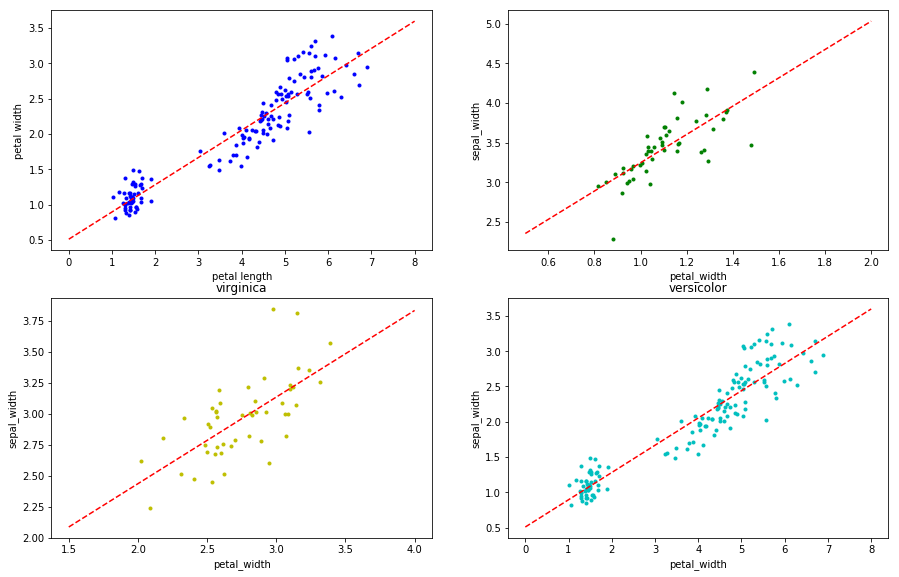

In [10]:
f, axs = plt.subplots(2,2,figsize=(15,15))

# cas 1
x1 = iris_dna[['petal_length']].copy()
y1 = iris_dna['petal_width'].copy()
x_1 = np.array([0,8])
y_1 = a1*x_1+b1

plt.subplot(321)
plt.plot(x1,y1,'b.')
plt.plot(x_1,y_1,'r--')
plt.xlabel('petal length')
plt.ylabel('petal width')

# cas 2
x2 = iris_setosa[['petal_width']].copy()
y2 = iris_setosa['sepal_width'].copy()
x_2 = np.array([0.5,2])
y_2 = a2*x_2+b2

plt.subplot(322)
plt.plot(x2,y2,'g.')
plt.plot(x_2,y_2,'r--')
plt.xlabel('petal_width')
plt.ylabel('sepal_width')

# cas 3
x3 = iris_virginica[['petal_width']].copy()
y3 = iris_virginica['sepal_width'].copy()
x_3 = np.array([1.5,4])
y_3 = a3*x_3+b3

plt.subplot(323)
plt.plot(x3,y3,'y.')
plt.plot(x_3,y_3,'r--')
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.title('virginica')


# cas 4
x4 = iris_versicolor[['petal_width']].copy()
y4 = iris_versicolor['sepal_width'].copy()
x_4 = np.array([0,8])
y_4 = a4*x_4+b4

plt.subplot(324)
plt.plot(x1,y1,'c.')
plt.plot(x_1,y_1,'r--')
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.title('versicolor')

plt.show()